# K-means Clustering

The process of separating the population or data points into several groups so that the data points within each group are more similar to each other than the data points outside of it is known as clustering. To put it simply, the goal is to identify and classify groups that have similar characteristics into clusters.


## How K-means algorithm works?


The K-means algorithm in data mining begins by selecting a set of initial centroids randomly, which act as the starting point for each cluster. The algorithm then repeatedly executes calculations to refine the centroids' positions. This process continues until one of two conditions is met: either the centroids reach a point where their positions no longer change, indicating successful clustering, or a predetermined number of iterations is completed.

## Lets start the K-means clustering step-by-step:

### Step1: Data Loading
Reading the dataset from the CSV file.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
file_path = '/content/Mall_Customers.csv'  # Replace with your file path
data = pd.read_csv(file_path)



### Step2: Data Cleaning

Here, we'll check for missing values and handle them appropriately.

In [47]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
if data.isnull().sum().any():
    data = data.dropna()  # or you can choose to fill missing values

### Step 3: Feature Selection

In [48]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

### Step4: K-means Clustering Analysis:
Determining the optimal number of clusters using the elbow method.
Applying K-means clustering with the chosen number of clusters.
Adding cluster information to the dataset.

In [49]:
# Determining the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Applying K-means clustering with the chosen number of clusters
optimal_clusters = 5  # Determined from the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features)
data['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

### Step 5: Visualization

Creating an Elbow plot for determining the optimal number of clusters.
Creating a 3D plot to visualize the clustering result.


### What is Elbow Method?
The **Elbow Method** is used to determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters and finding the "elbow point" where the rate of decrease sharply changes.




### How to Use the Elbow Method Code?
Prepare Your Data: Ensure that your data is loaded into a DataFrame and you have selected the relevant features for clustering. These features should be in the features DataFrame.

Run the Elbow Method Code: The code will perform K-means clustering for a range of cluster numbers (from 1 to 10 in this case) and calculate the WCSS for each.

Analyze the Plot: Look for the "elbow point" in the plot where the WCSS starts to decrease at a slower rate. This point suggests a suitable number of clusters for your data.

Decide on the Number of Clusters: Use this number for your final K-means clustering.


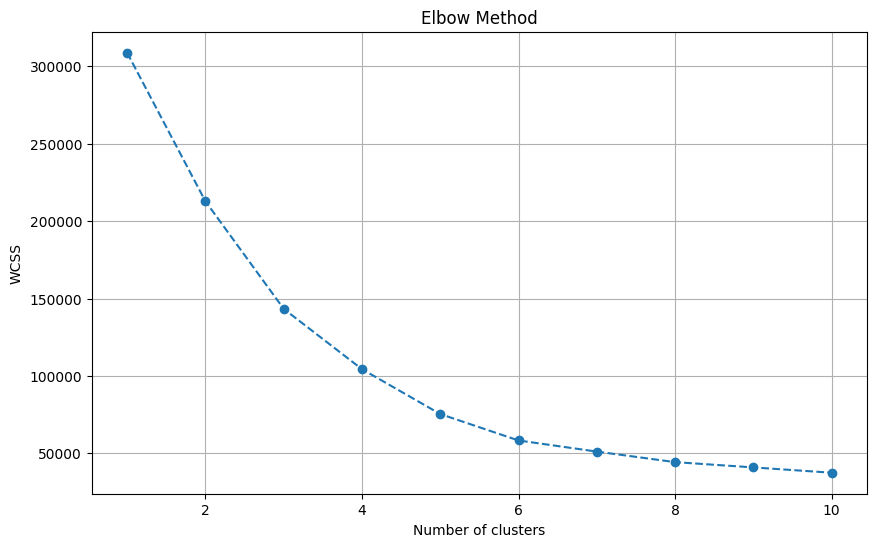

In [50]:
# Creating the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


Creating a 3D plot to visualize the clustering result.

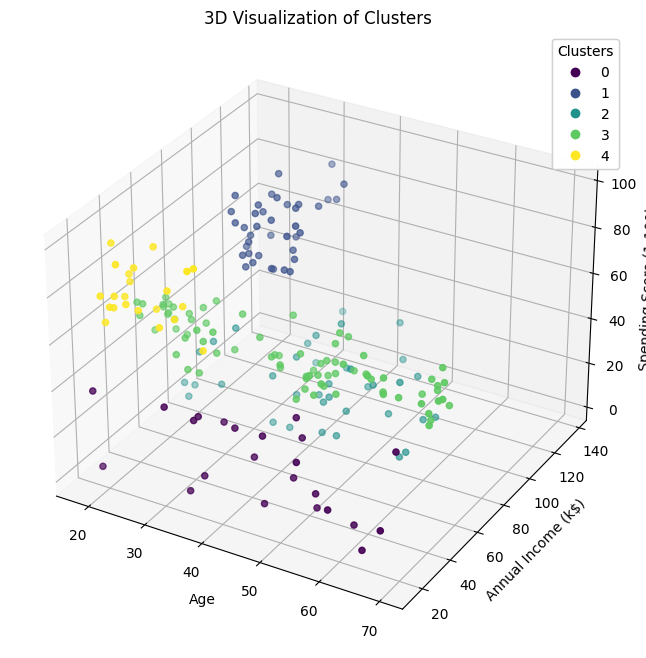

In [51]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'],
                     c=data['Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Visualization of Clusters')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()